# Core Libraries

In [47]:
library(dplyr)
library(tidyverse)

# Data Import

In [141]:
data <- read.csv(file="sql_5_JSON_output.csv", header=TRUE,sep=",",dec=";")

data_control <- read.csv(file="sql_4_output.csv", header=TRUE,sep=",",dec=";")

#Data Import Check/Cleaning

In [142]:
nrow(data)

[1] 5852

In [ ]:
head(data)

In [143]:
str(data)

'data.frame':	5852 obs. of  15 variables:
 $ business_id            : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "018ixB-WinNmflwX2UvS1g" "01mP5a06zQpaYOakfaVBOQ" ...
 $ business_lat           : chr  "39.9532594" "40.0571665" "39.9461554" "40.0727911933" ...
 $ business_long          : chr  "-75.2170205" "-75.2357367" "-75.1688026" "-75.1949470435" ...
 $ business_stars         : chr  "3.0" "4.5" "4.0" "2.5" ...
 $ business_stars_pre_2020: chr  "3.2" "4.6" "3.9" "2.5" ...
 $ review_count           : int  70 92 16 61 45 101 11 65 620 8 ...
 $ review_count_pre_2020  : chr  "75" "68" "16" "58" ...
 $ check_in_count         : chr  "73" "98" "39" "56" ...
 $ check_in_count_pre_2020: chr  "73" "89" "39" "56" ...
 $ attribute_count        : chr  "9" "8" "4" "8" ...
 $ business_park          : int  1 1 1 0 1 1 1 1 1 0 ...
 $ business_happy_h       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ business_price         : chr  "1" "1" "1" "2" ...
 $ business_open          : int  1 1 0 1 0 1 0 1 1 1

In [144]:
# NA values are represented in two ways: 'NULL' and 'None'. Thereafter we get 1 more factor level.

unique(data$business_price)

[1] "1"    "2"    "NULL" "3"    "4"    "None"

In [145]:
# To fix problem: Replace

data <- data %>%
  mutate(business_price = na_if(business_price, 'NULL')) %>%
  mutate(business_price = na_if(business_price, 'None'))

In [146]:
data$business_id  <- as.character(data$business_id)

data$business_lat <- as.numeric(data$business_lat)

data$business_long <- as.numeric(data$business_long)

data$business_stars <- as.numeric(data$business_stars)

data$business_stars_pre_2020 <- as.numeric(data$business_stars_pre_2020) #Has NA'S

data$business_review_count <- as.integer(data$review_count)

data$review_count_pre_2020 <- as.integer(data$review_count_pre_2020) #Has NA'S

data$check_in_count <- as.integer(data$check_in_count)

data$check_in_count_pre_2020 <- as.integer(data$check_in_count_pre_2020)

data$attribute_count <- as.integer(data$attribute_count)

data$business_park <- as.factor(data$business_park)

data$business_happy_h <- as.factor(data$business_happy_h)

data$business_price <- as.factor(data$business_price)

data$business_open  <- as.factor(data$business_open)

data$n_photo <- as.integer(data$n_photo)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [147]:
summary(data)

 business_id         business_lat   business_long    business_stars 
 Length:5852        Min.   :39.87   Min.   :-75.36   Min.   :1.000  
 Class :character   1st Qu.:39.95   1st Qu.:-75.18   1st Qu.:3.000  
 Mode  :character   Median :39.95   Median :-75.16   Median :3.500  
                    Mean   :39.97   Mean   :-75.15   Mean   :3.556  
                    3rd Qu.:40.00   3rd Qu.:-75.14   3rd Qu.:4.000  
                    Max.   :40.14   Max.   :-74.94   Max.   :5.000  
                                                                    
 business_stars_pre_2020  review_count    review_count_pre_2020
 Min.   :1.000           Min.   :   5.0   Min.   :   1.0       
 1st Qu.:3.100           1st Qu.:  14.0   1st Qu.:  12.0       
 Median :3.700           Median :  38.5   Median :  36.0       
 Mean   :3.553           Mean   : 113.8   Mean   : 108.7       
 3rd Qu.:4.100           3rd Qu.: 114.0   3rd Qu.: 112.0       
 Max.   :5.000           Max.   :5721.0   Max.   :5277.0       


In [148]:
sum(is.na(data$business_price))

[1] 913

# Distance Calculation


In [ ]:
install.packages("geosphere")

In [13]:
library(geosphere)

In [149]:
data_1 <- data %>%
  select(business_id, business_lat, business_long)

In [150]:
# Calculate pairwise distances for all businesses
df_distances <- data_1 %>%
  mutate(distances = apply(data_1[, c("business_long", "business_lat")], 1, function(x) distHaversine(data_1[, c("business_long", "business_lat")], x))) %>%
    select(business_id, distances)

In [151]:
# Seting a threshold distance (in meters)
threshold_distance <- 1000

# Filtering distances to find nearby businesses
nearby_counts <- df_distances %>%
  mutate(nearby_count = rowSums(distances <= threshold_distance), nearby_count_minus_1 = nearby_count - 1) %>% #adjusting for each business counting itself (subtracting 1 from each count)
    select(business_id, nearby_count_minus_1)

# Results
head(nearby_counts)

,business_id,nearby_count_minus_1
,<chr>,<dbl>
1,00AGVWzkxNLGb-7ZrwAOIA,145
2,00rIcvqmfci_oJWkOqPqmg,11
3,018ixB-WinNmflwX2UvS1g,1016
4,01mP5a06zQpaYOakfaVBOQ,42
5,01YFYYmevGER3VJ1xFtUcA,326
6,02nb6CI8w-2EoSEkQdk2Wg,405


## Left Join into Dataset

In [152]:
#For nearby_counts, i.e. business_proximity

data <- data %>%
            left_join(nearby_counts, by="business_id")

In [ ]:
head(data)

# Missing Values

In [ ]:
install.packages("mice")

In [ ]:
library(mice)

In [153]:
# Selecting the variables for analysis:
data_to_analysis <- data %>%
    select(check_in_count_pre_2020, business_stars_pre_2020, nearby_count_minus_1, attribute_count, business_price, business_happy_h)

## Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [154]:
model_pre_mice <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h,
                                                   data_to_analysis)

In [155]:
summary(model_pre_mice)


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h, data = data_to_analysis)

Residuals:
    Min      1Q  Median      3Q     Max 
 -865.8  -203.0   -63.2    68.8 16924.7 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -401.24984   36.41589 -11.019  < 2e-16 ***
business_stars_pre_2020             42.57228   10.02277   4.248 2.20e-05 ***
nearby_count_minus_1                 0.22957    0.01882  12.199  < 2e-16 ***
attribute_count                     39.50370    2.08540  18.943  < 2e-16 ***
business_price2                     67.52226   17.01760   3.968 7.36e-05 ***
business_price3                     25.76878   48.62697   0.530   0.5962    
business_price4                    137.62966   98.66237   1.395   0.1631    
business_happy_h1                  -93.49891   58.32871  -1.603   0.1090    
business_price2

In [ ]:
# (1094 observations deleted due to missingness)

## Pattern of Missings

In [77]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,nearby_count_minus_1,business_happy_h,attribute_count,business_stars_pre_2020,check_in_count_pre_2020,business_price,
4758,1,1,1,1,1,1,0
529,1,1,1,1,1,0,1
136,1,1,1,1,0,1,1
60,1,1,1,1,0,0,2
4,1,1,1,0,1,0,2
45,1,1,1,0,0,1,2
267,1,1,1,0,0,0,3
23,1,1,0,1,1,0,2
11,1,1,0,1,0,0,3
19,1,1,0,0,0,0,4


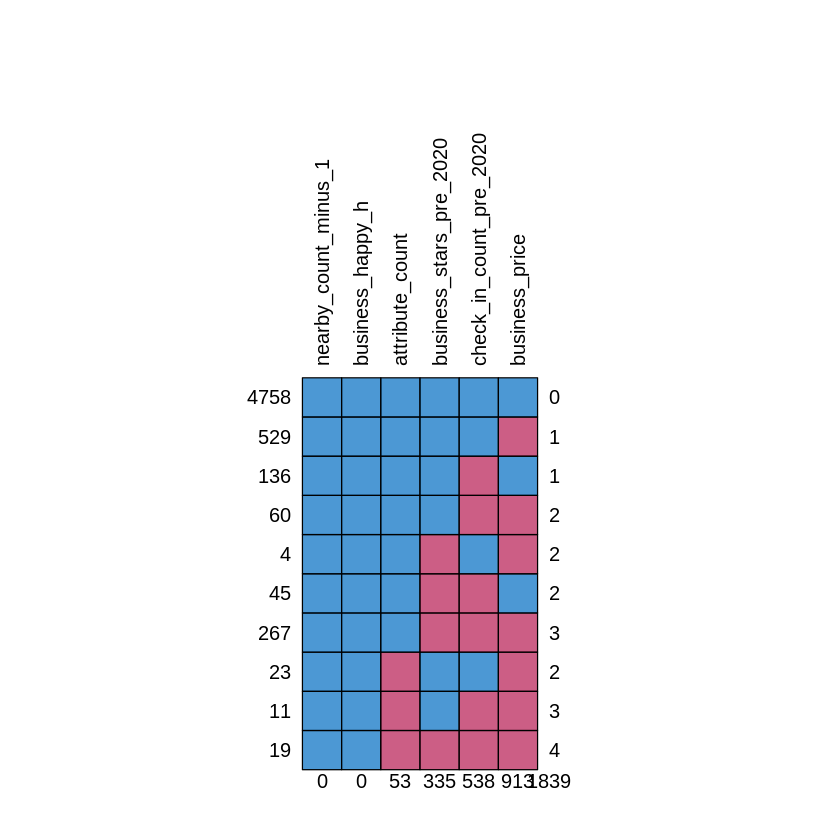

In [156]:
#inspect pattern of missings
md.pattern(data_to_analysis, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [158]:
### Impute Data via mice
MiceImputedData <- mice(data_to_analysis, m=20, maxit = 50, seed = 543, print=FALSE)

In [159]:
summary(MiceImputedData)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
check_in_count_pre_2020 business_stars_pre_2020    nearby_count_minus_1 
                  "pmm"                   "pmm"                      "" 
        attribute_count          business_price        business_happy_h 
                  "pmm"               "polyreg"                      "" 
PredictorMatrix:
                        check_in_count_pre_2020 business_stars_pre_2020
check_in_count_pre_2020                       0                       1
business_stars_pre_2020                       1                       0
nearby_count_minus_1                          1                       1
attribute_count                               1                       1
business_price                                1                       1
business_happy_h                              1                       1
                        nearby_count_minus_1 attribute_count business_price
check_in_count_pre_2020                   

## RUN

### Run with (2nd out of 20)

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData <- complete(MiceImputedData, 2)

MiceCompleteData

In [161]:
model_after_mice <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h,
                                                   MiceCompleteData)

In [163]:
summary(model_after_mice) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h, data = MiceCompleteData)

Residuals:
    Min      1Q  Median      3Q     Max 
 -936.1  -183.7   -55.3    66.1 16980.4 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -325.56825   29.08911 -11.192  < 2e-16 ***
business_stars_pre_2020             31.82417    7.83178   4.063  4.9e-05 ***
nearby_count_minus_1                 0.20391    0.01566  13.020  < 2e-16 ***
attribute_count                     37.00312    1.59293  23.230  < 2e-16 ***
business_price2                     52.73813   14.03759   3.757 0.000174 ***
business_price3                     14.12162   38.18705   0.370 0.711544    
business_price4                     97.27115   78.49635   1.239 0.215328    
business_happy_h1                 -103.33811   49.63601  -2.082 0.037393 *  
business_price2

### Run with pooled_mice

In [164]:
#build predictive model for all generated imputed data sets
MiceAllModels <- with(MiceImputedData, lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h))

In [165]:
#combine results of all 20 models
pooled_Mice <- pool(MiceAllModels)

**Results**

In [166]:
pooled_Mice_results <- as.data.frame(summary(pooled_Mice))
pooled_Mice_results

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-320.8941205,29.50386868,-10.8763405,5243.793,2.915787e-27
business_stars_pre_2020,30.4575008,7.94090186,3.8355216,5564.093,1.266838e-04
nearby_count_minus_1,0.2065079,0.01611153,12.8173983,3349.878,9.438400e-37
attribute_count,36.6654078,1.62592515,22.5504894,4796.103,4.127828e-107
business_price2,56.4451505,14.41858218,3.9147504,3871.681,9.205482e-05
business_price3,16.4062157,38.65021049,0.4244793,3273.307,6.712442e-01
business_price4,104.6955597,84.59805723,1.2375646,1090.263,2.161440e-01
business_happy_h1,-93.3519219,49.83128251,-1.8733598,5359.960,6.107309e-02
business_price2:business_happy_h1,114.7305729,54.10947209,2.1203418,4263.042,3.403483e-02


In [ ]:
# Adding significance level visualization to the above df:

pooled_Mice_results %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-322.9206581,29.71543409,-10.86710216,5229.714,3.225042e-27,***
business_stars_pre_2020,30.8142798,8.02709702,3.83878253,4932.669,1.251941e-04,***
nearby_count_minus_1,0.2068899,0.01653178,12.51468192,1683.276,2.006455e-34,***
attribute_count,36.7117242,1.63843335,22.40660217,4180.495,4.174460e-105,***
business_price2,55.9426855,14.28610596,3.91588062,5403.575,9.118456e-05,***
business_price3,15.1479266,38.68412927,0.39157988,3782.844,6.953907e-01,
business_price4,104.5620113,82.76591260,1.26334632,3123.836,2.065590e-01,
business_happy_h1,-94.2997178,50.08987124,-1.88261050,5324.203,5.980765e-02,.
business_price2:business_happy_h1,117.3609424,54.25328188,2.16320448,4543.149,3.057744e-02,*


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [167]:
# R-square for Pooled Model.

pooled_R_2 <- pool.r.squared(MiceAllModels)
pooled_R_2

,est,lo 95,hi 95,fmi
R^2,0.1748405,0.1573166,0.1928864,0.01251348
